In [4]:
!pip install pandas
!pip install numpy
!pip install ccxt
!pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 2.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 8.2 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 392.1/392.1 kB 9.1 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.6/45.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.3/71.3 kB 7.4 MB/s eta 0:00:00
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.5/164.5 kB 2.0 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 10.9 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.5/254.5 kB 10.2 MB/s eta 0:00:00
Using cached cycler-0.12.

Bitcoin is in Uptrend (closing price: 96350.00, EMA200: 69575.23)


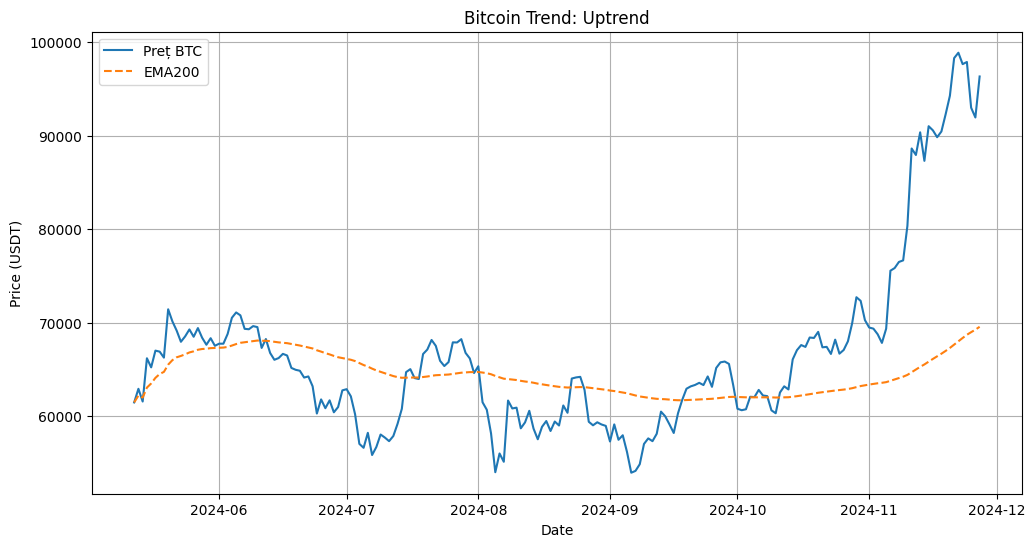

In [6]:
import ccxt
import pandas as pd
import matplotlib.pyplot as plt

exchange = ccxt.binance()  
symbol = 'BTC/USDT' 
timeframe = '1d' 

ohlcv = exchange.fetch_ohlcv(symbol, timeframe, limit=200)
columns = ['timestamp', 'open', 'high', 'low', 'close', 'volume']
df = pd.DataFrame(ohlcv, columns=columns)

df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

df['EMA200'] = df['close'].ewm(span=200).mean()

last_close = df['close'].iloc[-1]
last_ema200 = df['EMA200'].iloc[-1]

trend = "Uptrend" if last_close > last_ema200 else "Downtrend"
print(f"Bitcoin is in {trend} (closing price: {last_close:.2f}, EMA200: {last_ema200:.2f})")
 
plt.figure(figsize=(12, 6))
plt.plot(df['timestamp'], df['close'], label='Preț BTC', linewidth=1.5)
plt.plot(df['timestamp'], df['EMA200'], label='EMA200', linestyle='--', linewidth=1.5)
plt.title(f"Bitcoin Trend: {trend}")
plt.xlabel('Date')
plt.ylabel('Price (USDT)')
plt.legend()
plt.grid()
plt.show()